In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt  # to show fig

In [2]:
infected= pd.read_csv('C:/Users/yldrm/Desktop/gayesu/Data/time_series_covid19_confirmed_global.csv')
deaths= pd.read_csv('C:/Users/yldrm/Desktop/gayesu/Data/time_series_covid19_deaths_global.csv')
recovered= pd.read_csv('C:/Users/yldrm/Desktop/gayesu/Data/time_series_covid19_recovered_global.csv')
countries=pd.read_csv('C:/Users/yldrm/Desktop/gayesu/Data/UID_ISO_FIPS_LookUp_Table.csv')

In [3]:
infected.head()

,Province/State,Country/Region,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,...,6/6/20,6/7/20,6/8/20,6/9/20,6/10/20,6/11/20,6/12/20,6/13/20,6/14/20,6/15/20
0,NaN,Afghanistan,33.0000,65.0000,0,0,0,0,0,0,...,19551,20342,20917,21459,22142,22890,23546,24102,24766,25527
1,NaN,Albania,41.1533,20.1683,0,0,0,0,0,0,...,1232,1246,1263,1299,1341,1385,1416,1464,1521,1590
2,NaN,Algeria,28.0339,1.6596,0,0,0,0,0,0,...,10050,10154,10265,10382,10484,10589,10698,10810,10919,11031
3,NaN,Andorra,42.5063,1.5218,0,0,0,0,0,0,...,852,852,852,852,852,852,853,853,853,853
4,NaN,Angola,-11.2027,17.8739,0,0,0,0,0,0,...,88,91,92,96,113,118,130,138,140,142


In [4]:

infected['Province/State'].value_counts()

Province/State
Australian Capital Territory    1
Qinghai                         1
Reunion                         1
New Caledonia                   1
Mayotte                         1
                               ..
Guizhou                         1
Guangxi                         1
Guangdong                       1
Gansu                           1
Saint Pierre and Miquelon       1
Name: count, Length: 81, dtype: int64

In [5]:
infected.loc[infected['Country/Region'] == 'China']

,Province/State,Country/Region,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,...,6/6/20,6/7/20,6/8/20,6/9/20,6/10/20,6/11/20,6/12/20,6/13/20,6/14/20,6/15/20
49,Anhui,China,31.8257,117.2264,1,9,15,39,60,70,...,991,991,991,991,991,991,991,991,991,991
50,Beijing,China,40.1824,116.4142,14,22,36,41,68,80,...,594,594,594,594,594,595,601,637,673,700
51,Chongqing,China,30.0572,107.8740,6,9,27,57,75,110,...,579,579,579,579,579,579,579,580,582,582
52,Fujian,China,26.0789,117.9874,1,5,10,18,35,59,...,359,359,359,359,360,361,361,361,362,362
53,Gansu,China,37.8099,101.0583,0,2,2,4,7,14,...,139,139,139,139,139,139,139,139,139,139
54,Guangdong,China,23.3417,113.4244,26,32,53,78,111,151,...,1602,1602,1604,1604,1607,1607,1608,1625,1625,1628
55,Guangxi,China,23.8298,108.7881,2,5,23,23,36,46,...,254,254,254,254,254,254,254,254,254,254
56,Guizhou,China,26.8154,106.8748,1,3,3,4,5,7,...,147,147,147,147,147,147,147,147,147,147
57,Hainan,China,19.1959,109.7453,4,5,8,19,22,33,...,170,170,170,170,170,170,171,171,171,171
58,Hebei,China,39.5490,116.1306,1,1,2,8,13,18,...,328,328,328,328,328,328,328,328,331,335


In [6]:
df_infected= infected.groupby('Country/Region').sum() #eyaletlere göre satırları topluyor

In [7]:
df_infected.head(20)
df_infected.info

<bound method DataFrame.info of                    Province/State        Lat       Long  1/22/20  1/23/20  \
Country/Region                                                              
Afghanistan                     0  33.000000  65.000000        0        0   
Albania                         0  41.153300  20.168300        0        0   
Algeria                         0  28.033900   1.659600        0        0   
Andorra                         0  42.506300   1.521800        0        0   
Angola                          0 -11.202700  17.873900        0        0   
...                           ...        ...        ...      ...      ...   
West Bank and Gaza              0  31.952200  35.233200        0        0   
Western Sahara                  0  24.215500 -12.885800        0        0   
Yemen                           0  15.552727  48.516388        0        0   
Zambia                          0 -15.416700  28.283300        0        0   
Zimbabwe                        0 -20.000000

In [8]:
df_infected[df_infected['Province/State'] != 0]

,Province/State,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,1/28/20,...,6/6/20,6/7/20,6/8/20,6/9/20,6/10/20,6/11/20,6/12/20,6/13/20,6/14/20,6/15/20
Country/Region,,,,,,,,,,,,,,,,,,,,,
Australia,Australian Capital TerritoryNew South WalesNor...,-255.9695,1129.8623,0,0,0,0,4,5,5,...,7259,7265,7267,7274,7285,7289,7294,7320,7335,7347
Canada,AlbertaBritish ColumbiaGrand PrincessManitobaN...,671.7607,-1237.6289,0,0,0,0,1,1,2,...,96475,97178,97779,98241,98720,99159,99595,100043,100404,100763
China,AnhuiBeijingChongqingFujianGansuGuangdongGuang...,1083.3367,3684.4197,548,643,920,1406,2075,2877,5509,...,84186,84191,84195,84198,84209,84216,84228,84286,84335,84378
Denmark,Faroe IslandsGreenland,189.8634,-40.0143,0,0,0,0,0,0,0,...,12124,12148,12162,12201,12216,12235,12299,12339,12393,12417
France,French GuianaFrench PolynesiaGuadeloupeMayotte...,91.3624,59.7192,0,0,2,3,3,3,4,...,190759,191102,191313,191523,192068,192493,193220,193746,194153,194305
Netherlands,"ArubaCuracaoSint MaartenBonaire, Sint Eustatiu...",107.0417,-265.0278,0,0,0,0,0,0,0,...,47541,47780,47945,48109,48294,48458,48668,48847,48990,49155
United Kingdom,BermudaCayman IslandsChannel IslandsGibraltarI...,270.0299,-482.9247,0,0,0,0,0,0,0,...,286294,287621,288834,290581,291588,292860,294402,295828,297342,298315


In [9]:
df_recovered = recovered.groupby('Country/Region').sum()
df_deaths = deaths.groupby('Country/Region').sum()

In [10]:
df_infected.loc['China'].to_frame() #çin sutunu

,China
Province/State,AnhuiBeijingChongqingFujianGansuGuangdongGuang...
Lat,1083.3367
Long,3684.4197
1/22/20,548
1/23/20,643
...,...
6/11/20,84216
6/12/20,84228
6/13/20,84286
6/14/20,84335


In [11]:
import matplotlib.pyplot as plt
plt.rcParams["figure.figsize"] = (12,6)

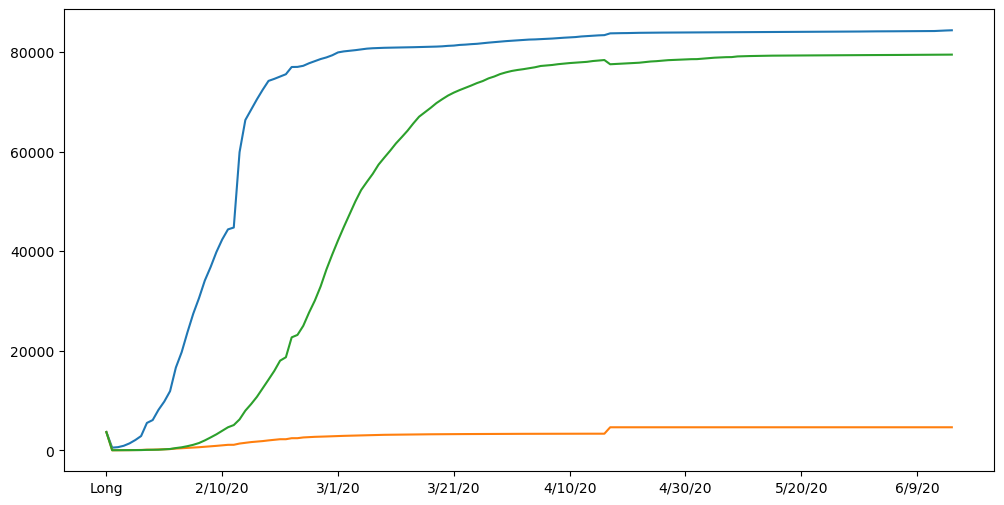

In [12]:
df_infected.loc['China'][2:].plot() 
df_deaths.loc['China'][2:].plot()
df_recovered.loc['China'][2:].plot()
plt.show()

In [13]:
df_infected.loc['China'][1:]

Lat        1083.3367
Long       3684.4197
1/22/20          548
1/23/20          643
1/24/20          920
             ...    
6/11/20        84216
6/12/20        84228
6/13/20        84286
6/14/20        84335
6/15/20        84378
Name: China, Length: 148, dtype: object

In [14]:
df_infected.drop(columns=['Lat', 'Long', 'Province/State'], inplace=False)
df_recovered = df_recovered.drop(columns=['Lat', 'Long', 'Province/State'])
df_deaths = df_deaths.drop(columns=['Lat', 'Long', 'Province/State'])

In [15]:
def make_frame(country:str):
    """Take country name as parameter, return infected, recovered, deaths values as timeseries table.
    pd.DataFrame()
    """
    pass

In [16]:
def make_frame(country:str):
    """Take country name as parameter, return infected, recovered, deaths values as timeseries table.
    
    """

    df = pd.DataFrame({
        'infected' : df_infected.loc[country],
        'recovered': df_recovered.loc[country],
        'deaths': df_deaths.loc[country]
    })
    df.index = pd.to_datetime(df.index, format='%m/%d/%y')
    return df

In [17]:
"""df_us = make_frame('US')
df_turkey = make_frame('Turkey")""" 
# lATIN 146INCI KONUMUNDA HATA VERİYOR.

'df_us = make_frame(\'US\')\ndf_turkey = make_frame(\'Turkey")'

In [18]:
#df_us['new_infected'] = df_us['infected'].diff() DİFF ARADAKİ FARKI VERİYOR.

In [19]:
import matplotlib.pyplot as plt
import matplotlib.colors as mcolors
import matplotlib.patches as mpatches
import seaborn as sns
import numpy as np
import pandas as pd

In [20]:
birds=pd.read_csv('C:/Users/yldrm/Desktop/gayesu/Data/birds.csv')
birds_df=pd.DataFrame(birds)
#df_birds=birds.groupby("Category").sum()
#df_birds.head(10)
birds_df.head(10)

,Name,ScientificName,Category,Order,Family,Genus,ConservationStatus,MinLength,MaxLength,MinBodyMass,MaxBodyMass,MinWingspan,MaxWingspan
0,Black-bellied whistling-duck,Dendrocygna autumnalis,Ducks/Geese/Waterfowl,Anseriformes,Anatidae,Dendrocygna,LC,47.0,56.0,652.0,1020.0,76.0,94.0
1,Fulvous whistling-duck,Dendrocygna bicolor,Ducks/Geese/Waterfowl,Anseriformes,Anatidae,Dendrocygna,LC,45.0,53.0,712.0,1050.0,85.0,93.0
2,Snow goose,Anser caerulescens,Ducks/Geese/Waterfowl,Anseriformes,Anatidae,Anser,LC,64.0,79.0,2050.0,4050.0,135.0,165.0
3,Ross's goose,Anser rossii,Ducks/Geese/Waterfowl,Anseriformes,Anatidae,Anser,LC,57.3,64.0,1066.0,1567.0,113.0,116.0
4,Greater white-fronted goose,Anser albifrons,Ducks/Geese/Waterfowl,Anseriformes,Anatidae,Anser,LC,64.0,81.0,1930.0,3310.0,130.0,165.0
5,Brant,Branta bernicla,Ducks/Geese/Waterfowl,Anseriformes,Anatidae,Branta,LC,55.0,66.0,880.0,2200.0,206.0,121.0
6,Cackling goose,Branta hutchinsii,Ducks/Geese/Waterfowl,Anseriformes,Anatidae,Branta,LC,63.0,65.0,1398.0,2380.0,108.0,111.0
7,Canada goose,Branta canadensis,Ducks/Geese/Waterfowl,Anseriformes,Anatidae,Branta,LC,75.0,110.0,2600.0,6500.0,127.0,185.0
8,Mute swan,Cygnus olor,Ducks/Geese/Waterfowl,Anseriformes,Anatidae,Cygnus,LC,125.0,170.0,9200.0,14300.0,200.0,240.0
9,Trumpeter swan,Cygnus buccinator,Ducks/Geese/Waterfowl,Anseriformes,Anatidae,Cygnus,LC,138.0,180.0,7000.0,13600.0,185.0,250.0


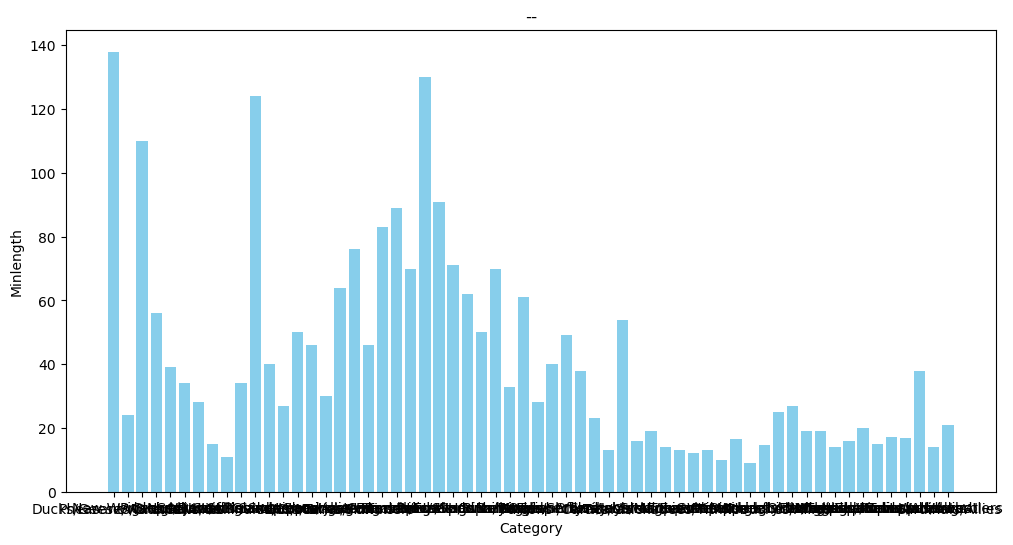

In [21]:
plt.bar(birds_df['Category'], birds_df['MinLength'], color='skyblue')
plt.xlabel('Category')
plt.ylabel('Minlength')
plt.title('--')
plt.show()

In [48]:
df_birds=pd.DataFrame(birds.groupby("Category")["MinLength"].mean())
df_birds.head()

,MinLength
Category,
Auks/Murres/Puffins,23.5
Barn-owls,33.0
Cardinals/Allies,15.5
Cormorants/Shags,67.0
Cranes,102.0


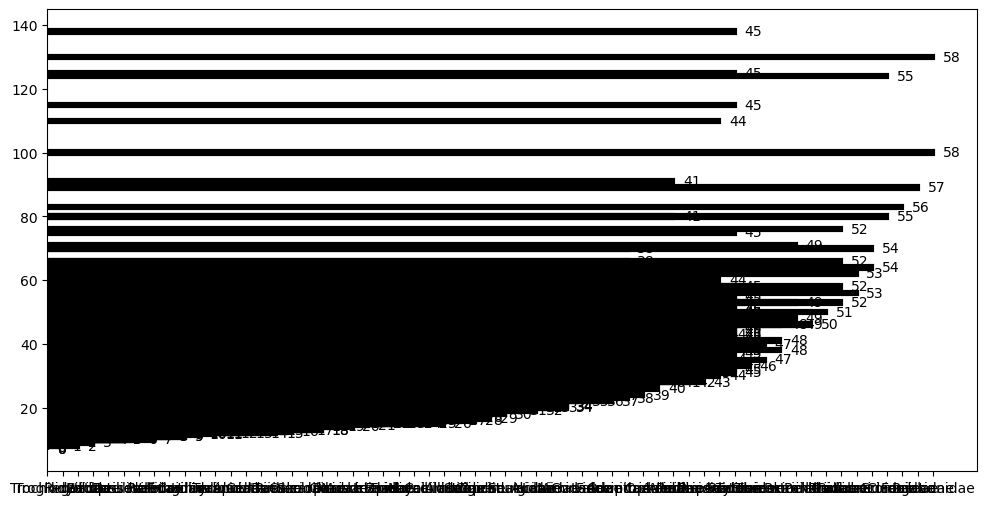

In [30]:
plt.barh(y=birds_df.MinLength, width=birds_df.Family)

birds_df= birds_df.sort_values(by=['MinLength'])
my_plot = plt.barh(
    y=birds_df.MinLength,
    width=birds_df.Family,
    color=mcolors.TABLEAU_COLORS,
    edgecolor='black',
    linewidth=3
    )
plt.bar_label(container=my_plot, padding=7)
plt.show()

<Axes: xlabel='MinLength', ylabel='Count'>

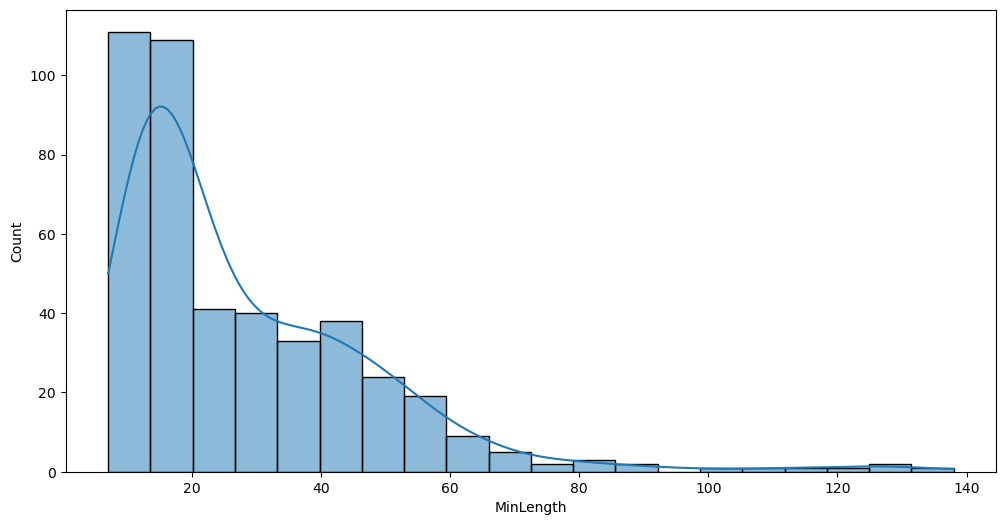

In [ ]:
birds_df.head(10)
sns.histplot(data=birds_df, x='MinLength', kde=True)

In [ ]:
sns.regplot(
    x=df_iris['sepal_length'],
    y=df_iris['sepal_width'],
    marker= "+",
    line_kws={
        "color":"red",
        "alpha":0.6,
        "lw":5 
    },
    scatter_kws={
        "color":"darkblue",
        "s":50
    }
    )